In [220]:
import numpy as np
import pandas as pd
from collections import Counter

%matplotlib inline

In [48]:
racedf = pd.read_csv('race.csv')
df311 = pd.read_csv('311census_blockgroups_geoids.csv')
#df311 = df311.dropna()
racedf = racedf.set_index('geoid')

2467.0

In [83]:
racedf = racedf.set_index('geoid')
racedf[racedf.index.str.startswith('15000US250251707012')]

,Unnamed: 0,name,Total:,Total: error,Not Hispanic or Latino:,Not Hispanic or Latino: error,White alone,White alone error,Black or African American alone,Black or African American alone error,...,Native Hawaiian and Other Pacific Islander alone error.1,Some other race alone.1,Some other race alone error.1,Two or more races:.1,Two or more races: error.1,Two races including Some other race.1,Two races including Some other race error.1,"Two races excluding Some other race, and three or more races.1","Two races excluding Some other race, and three or more races error.1",geometry
geoid,,,,,,,,,,,,,,,,,,,,,
15000US250251707012,80,"Block Group 2, Suffolk, MA",1455.0,213.0,967.0,167.0,558.0,187.0,66.0,58.0,...,12.0,91.0,82.0,121.0,75.0,0.0,12.0,121.0,75.0,"POLYGON ((-70.9971 42.4011, -70.997091 42.4011..."


In [67]:
racedf.columns
'White alone','Black or African American alone', 'American Indian and Alaska Native alone','Asian alone',

Index(['Unnamed: 0', 'name', 'Total:', 'Total: error',
       'Not Hispanic or Latino:', 'Not Hispanic or Latino: error',
       'White alone', 'White alone error', 'Black or African American alone',
       'Black or African American alone error',
       'American Indian and Alaska Native alone',
       'American Indian and Alaska Native alone error', 'Asian alone',
       'Asian alone error', 'Native Hawaiian and Other Pacific Islander alone',
       'Native Hawaiian and Other Pacific Islander alone error',
       'Some other race alone', 'Some other race alone error',
       'Two or more races:', 'Two or more races: error',
       'Two races including Some other race',
       'Two races including Some other race error',
       'Two races excluding Some other race, and three or more races',
       'Two races excluding Some other race, and three or more races error',
       'Hispanic or Latino:', 'Hispanic or Latino: error', 'White alone.1',
       'White alone error.1', 'Black or Afri

In [70]:
racedf['White alone'][0]


698.0

In [69]:
racedf['White alone.1'][0]

81.0

In [201]:
geoid =df311['geoid']
d = dict(Counter(geoid))
population = list(d.keys())
for i in range(len(population)):
    population[i] = racedf[racedf.index.str.startswith(population[i])]['Total:'][0] +1

total_pop = sum(population)
#population = np.array([i/total_pop for i in population])
#np.argmax(population)

chisquared = 0
observed =(list(d.values()))
for i in range(len(population)):
    chisquared += (observed[i] - population[i] ) **2 /population[i]+1

KeyboardInterrupt: 

In [199]:


chisquared = 0
observed =(list(d.values()))
for i in range(len(population)):
    chisquared += (observed[i] - population[i] ) **2 /population[i]+1
    

In [44]:
racedf.head(1).index[0]

0

In [204]:
print(l[12])                                                
print(l[24])
print(l[36])


[0.3835051546391753, '15000US250251707012']
[0.523038605230386, '15000US250251701005']
[0.6368876080691642, '15000US250251701002']


In [175]:
ange(len(racedf)):
    if racedf.iloc[i][2] != 0:
        l +=[[(racedf.iloc[i][6]/racedf.iloc[i][2]),racedf.index[i]]]
d2 = {1:[],2:[]}



geoid = list(set(df311['geoid']))
for i in l:
    if i[1] in geoid:
        if i[0] < 0.55:
            d2[1] += [i[1]]
        else:
            d2[2] += [i[1]]
    
for i in d2:
    print(len(d2[i]))

21
21


In [200]:
racedf = pd.read_csv('race.csv')
df311 = pd.read_csv('311census_blockgroups_geoids.csv')
racedf = racedf.set_index('geoid')

geoid =df311['geoid']
total_req = len(geoid)
d = dict(Counter(geoid))
population = list(d.keys())
for i in range(len(population)):
    population[i] = racedf[racedf.index.str.startswith(population[i])]['Total:'][0] +1

expecteddict = {}

residuals = []
total_pop = sum(population)
#population = np.array([i/total_pop for i in population])
#np.argmax(population)
underover = {'under':[], 'over':[]}
chisquared = 0
observed =(list(d.values()))

for i in range(len(population)):
    expected = total_req * (population[i]/total_pop)
    expecteddict[list(d.keys())[i]] = expected
    
    if expected > 5:

        chisquared += (observed[i] - expected ) **2 /population[i]+1
        residuals += [(observed[i] - expected ) **2 /population[i]+1]
        if observed[i] <  expected:
            underover['under'] += [list(d.keys())[i]]
        else:
            underover['over'] += [list(d.keys())[i]]
            if (observed[i] - expected ) **2 /population[i]+1 > 400:
                print(observed[i],expected,list(d.keys())[i])
print()
print(len(population)-1)
print(chisquared)


506 105.76855187319886 15000US250251703003

43
1695.9375067201192


Text(0.5, 1.0, 'Residuals for Chi-Squared on 311 Distribution')

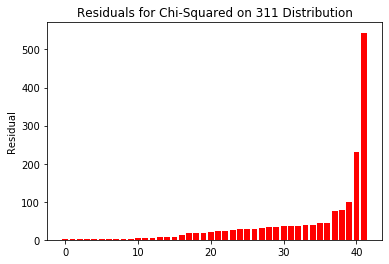

In [119]:
import matplotlib.pyplot as plt
plt.bar(range(len(residuals)),sorted(residuals),color='red')
plt.ylabel('Residual')
plt.title('Residuals for Chi-Squared on 311 Distribution')

In [188]:

cross = np.zeros((2,2))
x = -1
y = -1
for i in [1,2]:
    x+= 1
    y = -1
    for j in ['under', 'over']:
        y += 1
        cross[x][y] =  sum([1 for k in underover[j] if k in d2[i]])

expect = np.zeros((2,2))

for i in range(2):#row
    for j in range(2):
        expect[i][j] = (sum(cross[:,j]) * sum(cross[i])) / 42


In [197]:
sum(sum((cross - expect)**2 / expect))

0.8894117647058823

In [272]:

def analysis(df1, df2, cutoff,title):

    geoid =df1['geoid']
    total_req = len(geoid)
    print('Total Requests', total_req)
    d = dict(Counter(geoid))
    population = list(d.keys())
    for i in range(len(population)):
        population[i] = df2[df2.index.str.startswith(population[i])]['Total:'][0] +1

    expecteddict = {}

    residuals = []
    total_pop = sum(population)
    underover = {'under':[], 'over':[]}
    chisquared = 0
    observed =(list(d.values()))

    for i in range(len(population)):
        expected = total_req * (population[i]/total_pop)
        expecteddict[list(d.keys())[i]] = expected
        
        if expected > 5:

            chisquared += (observed[i] - expected ) **2 /population[i]+1
            residuals += [(observed[i] - expected ) **2 /population[i]+1]
            if observed[i] <  expected:
                underover['under'] += [list(d.keys())[i]]
            else:
                underover['over'] += [list(d.keys())[i]]
                if (observed[i] - expected ) **2 /population[i]+1 > 400:
                    print(observed[i],expected,list(d.keys())[i])
    print()
    print(len(population)-1)
    print(chisquared)

    l = []
    for i in range(len(df2)):
        if df2.iloc[i][2] != 0:
            l +=[[(df2.iloc[i][6]/df2.iloc[i][2]),df2.index[i]]]
    d2 = {1:[],2:[]}


    geoid = list(set(df1['geoid']))
    for i in l:
        if i[1] in geoid:
            if i[0] < cutoff:
                d2[1] += [i[1]]
            else:
                d2[2] += [i[1]]
    
    print('Group Sizes by Percentagte White')
    for i in d2:
        print(len(d2[i]))


    plt.bar(range(len(residuals)),sorted(residuals),color='red')
    plt.ylabel('Residual')
    plt.title(title)

    cross = np.zeros((2,2))
    x = -1
    y = -1
    for i in [1,2]:
        x+= 1
        y = -1
        for j in ['under', 'over']:
            y += 1
            cross[x][y] =  sum([1 for k in underover[j] if k in d2[i]])

    expect = np.zeros((2,2))

    for i in range(2):#row
        for j in range(2):
            expect[i][j] = (sum(cross[:,j]) * sum(cross[i])) / 42
    print('Observed Values')
    print(cross)
    print('Expected Values')
    print(expect)
    print('Chi Squared Calculation')
    print((cross - expect)**2 / expect) 
    print('Chi Squared Result')
    print(sum(sum((cross - expect)**2 / expect)))


Total Requests 19906
506 105.76855187319886 15000US250251703003

43
1695.9375067201192
Group Sizes by Percentagte White
21
21
Observed Values
[[10. 11.]
 [ 7. 14.]]
Expected Values
[[ 8.5 12.5]
 [ 8.5 12.5]]
Chi Squared Calculation
[[0.26470588 0.18      ]
 [0.26470588 0.18      ]]
Chi Squared Result
0.8894117647058823


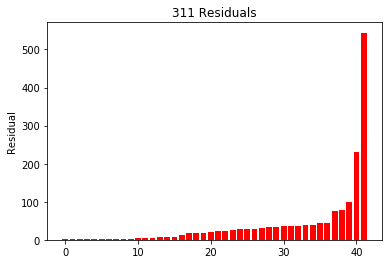

In [278]:
racedf = pd.read_csv('race.csv')
df311 = pd.read_csv('311census_blockgroups_geoids.csv')
df311 = df311.dropna()
racedf = racedf.set_index('geoid')

analysis(df311,racedf,.55, '311 Residuals')

In [261]:
df311 = pd.read_csv('311census_blockgroups_geoids.csv')
df311 = df311.dropna(subset=['geoid'])


In [268]:
df311_covid = df311[df311['Request Type'] == 'COVID']
df311_novid = df311[df311['Request Type'] != 'COVID']


(25043, 16)

Total Requests 19906
506 105.76855187319886 15000US250251703003

43
1695.9375067201192
Group Sizes by Percentagte White
21
21
Observed Values
[[10. 11.]
 [ 7. 14.]]
Expected Values
[[ 8.5 12.5]
 [ 8.5 12.5]]
Chi Squared Calculation
[[0.26470588 0.18      ]
 [0.26470588 0.18      ]]
Chi Squared Result
0.8894117647058823


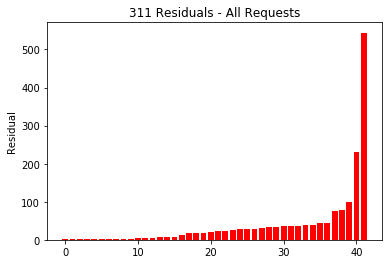

In [275]:
analysis(df311,racedf,.55, '311 Residuals - All Requests')

Total Requests 5219

42
380.24586787010657
Group Sizes by Percentagte White
21
21
Observed Values
[[16.  5.]
 [13.  8.]]
Expected Values
[[14.5  6.5]
 [14.5  6.5]]
Chi Squared Calculation
[[0.15517241 0.34615385]
 [0.15517241 0.34615385]]
Chi Squared Result
1.0026525198938991


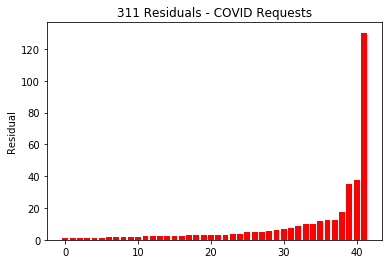

In [276]:
analysis(df311_covid,racedf,.55, '311 Residuals - COVID Requests')

Total Requests 19824
514 105.3328530259366 15000US250251703003

43
1773.088536618437
Group Sizes by Percentagte White
21
21
Observed Values
[[10. 11.]
 [ 8. 13.]]
Expected Values
[[ 9. 12.]
 [ 9. 12.]]
Chi Squared Calculation
[[0.11111111 0.08333333]
 [0.11111111 0.08333333]]
Chi Squared Result
0.38888888888888884


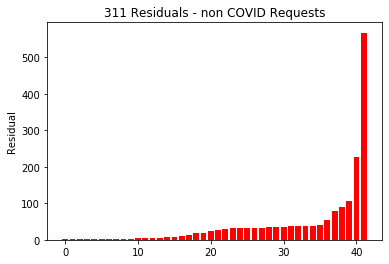

In [277]:
analysis(df311_novid,racedf,.55, '311 Residuals - non COVID Requests')